When talking about different types of data, Scales of Measurement is important for understanding how to break up data. 

Scales of Measurement:
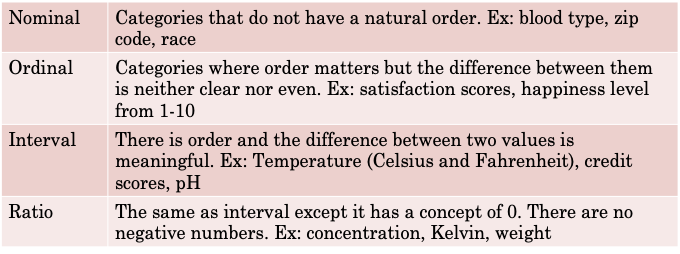


Central Tendency: represents the center point or “typical” value of a dataset-->median, mean or mode will be the indicators or measures of central tendency for a dataset. 

Depending on the kind of data and the values in it, you determine which measure to use. 
EX: if you have a dataset that have numbers close to each other but one number that is much different, then mean will not be a good measure of central tendency BUT median will be. 

Central tendency is the "middle number" of a dataset and the best representation of our data or a summary of our dataset.  

The outliers in the tail are pulling the mean away from the center towards the tail!
The median --represents central tendency of the skewed distribution. 

As you can see the mean either over or under estimates the central tendency of the data.

Which one of the following, mean, median, mode, will be the most useful when looking at categorical data? 
Blood type--MODE!
Will return the most common blood type in a dataset.

If we have ordinal data, which of the 3 would be useful?
because it is ordered, median will be the most useful. (mode would also be useful)

What if we have continuous data?
EX: measurements in millimeters. 
In this ex the mode won't be useful because you will have only slight discrepancies

Interval and Ratio have the same central tendency

For no skewed distribution, the mean will be the best indication of central tendency.
For skewed distribution, the median will be the best indicator of central tendency.
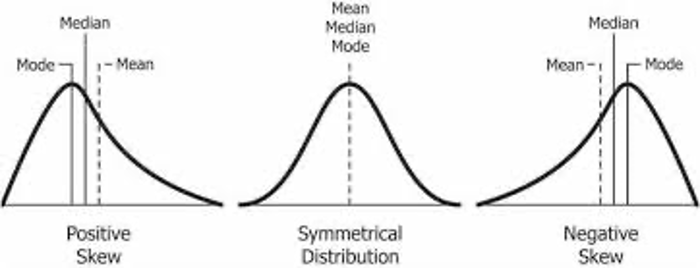

Variance, Covariance, Standard Deviation

Whenever you run codes about the 3 things above, you need to consider if your data is a SAMPLE or FULL POPULATION. Depending on which one you use, it will change the way your code works!


Correlation Coefficient (symbol r): Measurement of how strong the relationship is between the x and y axis. 

In [1]:
import numpy as np
import pandas as pd

#modules for statistics
import math
import statistics
from scipy import stats

# Mean, Median, Mode, and Central Tendency

mean = average, balance point
      = sum of all numbers/ total number of values
      = arithmetic mean
      outliers impact mean a decent amount
      
median = middle number when the all the values are put in order. outliers dont impact the median very much

mode = number that occurs most often

In [3]:
belize_listings_path = "belize_airbnb_listings.csv"
belize_df = pd.read_csv(belize_listings_path)
belize_df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,36666,Mo's Cozy Casa w/ veranda & access to dock,157752,Monique,Belize,Belize Islands,17.74786,-88.02398,Entire home/apt,141,3,250,2/23/2021,2.00,5,225
1,36690,Mo's Cozy Cabana w/ comfy veranda & access to ...,157752,Monique,Belize,Belize Islands,17.74832,-88.02474,Entire home/apt,71,3,316,2/19/2021,2.46,5,164
2,108932,Purple House eco solar w/ ocean & wildlife views,563377,Michael,Belize,Belize Islands,17.73221,-88.03824,Entire home/apt,191,2,30,3/14/2020,0.78,1,364
3,110483,Michelo's fuchsia suite,567809,Michel,Stann Creek,Stann Creek Mainland,16.52114,-88.36926,Hotel room,121,1,27,2/24/2020,0.29,3,331
4,120115,Seaside Villas Second Floor Unit #4,604999,Bobbi,Belize,Belize Islands,17.74166,-88.02395,Entire home/apt,343,1,30,3/18/2020,0.64,22,203


In [4]:
# get price, minimum_nights, and number or reviews only
#and find mean of all
belize_df[["price","minimum_nights","number_of_reviews"]].mean()

price                357.102289
minimum_nights         2.263948
number_of_reviews     14.453505
dtype: float64

In [5]:
belize_df[["price","minimum_nights","number_of_reviews"]].median()

price                220.0
minimum_nights         2.0
number_of_reviews      2.0
dtype: float64

In [6]:
belize_df[["price","minimum_nights","number_of_reviews"]].mode()

,price,minimum_nights,number_of_reviews
0,151,1.0,0.0
1,252,NaN,NaN


Text(0, 0.5, 'frequency')

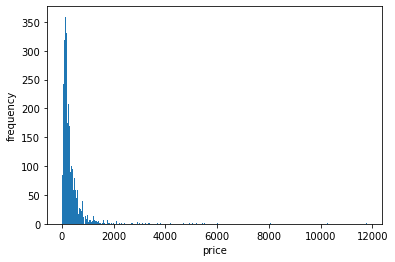

In [7]:
import matplotlib.pyplot as plt
n, bins, patches = plt.hist(x=belize_df['price'], bins='auto')
#search up patches!
plt.xlabel('price')
plt.ylabel('frequency')

#very right skewed so the best indication of cenral tendency will be the median.

#"People tend to have 2 nights as their minimum"

# Variance 

Variance measures how dispersed data points are from the mean. Low variance means the data points are pretty tightly clustered around the mean. High variance means the data points are pretty spread out from the mean.

Variance is like saying the data points are on average x away from the mean.

Variance of 0 means that all the data is the same

Degrees of freedom = number of independent pieces of information

In [8]:
#variance function
def variance(data,ddof=0):
    n = len(data)
    mean = sum(data)/n
    return sum((x-mean)**2 for x in data)/(n-ddof)

#for EACH x in the data, do (x - the mean)squared and add up all the answers. Then 
#divide by the total amount of data minus the degrees of freedom. 

#degrees of freedom(ddof)

In [9]:
#population variance
variance(belize_df['price'])

316996.1526270922

In [10]:
#built in variance calculation
statistics.pvariance(belize_df['price'])

316996.15262709244

In [11]:
#sample variance: WE SENT THE DEGREES OF FREEDOM TO 1 WHEN USING SAMPLE
variance(belize_df['price'],ddof=1)

317109.56806631474

In [13]:
#Sample variation
statistics.variance(belize_df['price'])

317109.568066315

# Standard Deviation

standard deviation is the square root of the variance.

Why? because square dollars dont make sense. We need to get rid of that squared value so we have an intuitive understanding of what we're talking about. 

Tells you how far, on average, each value lies from the mean

In [14]:
#population standard deviation

#This actually makes sense! ON average the points lie $563 away from the mean. This is 
#why standard deviation makes sense. Look at the variance above and see how nonsensical 
# it is! 
statistics.pstdev(belize_df['price'])

563.0241137172478

In [15]:
#sample standard devation 
statistics.stdev(belize_df['price'])

563.1248245871558

# Covariance and Correlation

Covariance is to correlation what variance is to standard deviation 

Covariance tells us how much and to what extent two random variables change together. In other words: how much will one variable change as another variable changes.

Positive = variables changing in same direction

Negative = variables changing in the opposite direction

Correlation tells us how strong the relationship is between the variables

correlation = (covariance of x and y)/((standard deviation of x)(standard deviation of y))

In [16]:
#covariance
np.cov(belize_df['number_of_reviews'],belize_df['price'])

#what do the 4 values represent?
#There is a negative correlation--pretty high one

array([[   919.77350828,  -2055.7279794 ],
       [ -2055.7279794 , 317109.56806632]])

In [17]:
np.corrcoef(belize_df['number_of_reviews'],belize_df['price'])

#high negative correlation--12%

array([[ 1.        , -0.12037063],
       [-0.12037063,  1.        ]])

# Aggregate Functions

In [19]:
belize_df.agg(["mean","std"])

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
mean,2.792490e+07,1.240278e+08,17.448295,-88.292035,357.102289,2.263948,14.453505,0.538088,22.848355,280.315451
std,1.288964e+07,1.018001e+08,0.537440,0.383876,563.124825,5.669843,30.327768,0.662154,51.711183,120.617632


# Manual Covariance Function

In [20]:
def covariance(x, y):
    #means
    mean_x = sum(x)/float(len(x))
    mean_y = sum(y)/float(len(y))
    
    #subtract mean from each value in each row
    sub_x = [i - mean_x for i in x]
    sub_y = [i - mean_y for i in y]
    
    numerator = sum([sub_x[i]*sub_y[i] for i in range(len(sub_x))])
    denominator = len(x)-1
    cov = numerator/denominator
    return cov

In [24]:
cov_reviews_availability = covariance(belize_df['number_of_reviews'],belize_df['price'])
cov_reviews_availability

-2055.7279794032315

In [25]:
cov_reviews_availability/(statistics.stdev(belize_df['number_of_reviews'])*statistics.stdev(belize_df['price']))

-0.1203706277634962

In [26]:
np.cov(belize_df['number_of_reviews'],belize_df['price'])

array([[   919.77350828,  -2055.7279794 ],
       [ -2055.7279794 , 317109.56806632]])

In [27]:
np.corrcoef(belize_df['number_of_reviews'],belize_df['price'])

array([[ 1.        , -0.12037063],
       [-0.12037063,  1.        ]])